<a href="https://colab.research.google.com/github/wintershine987/sea-level-rise-fisheries-AI/blob/main/SLR%20trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SLR data.xlsx to SLR data.xlsx


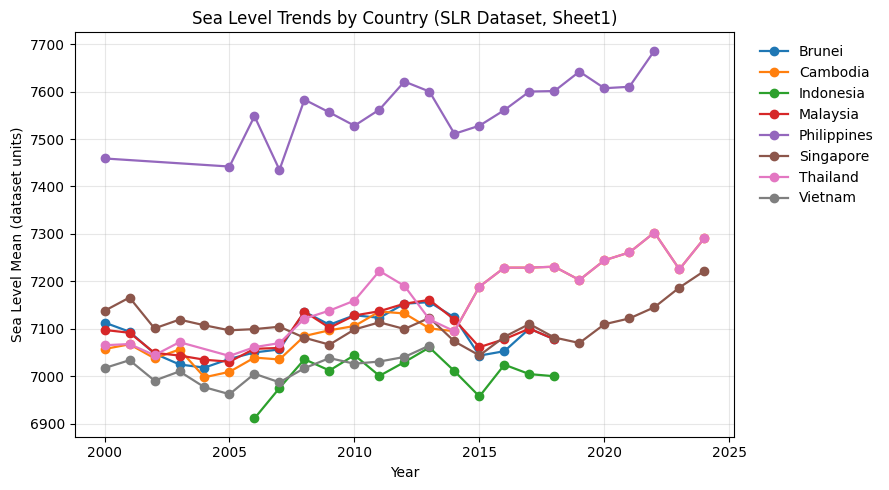

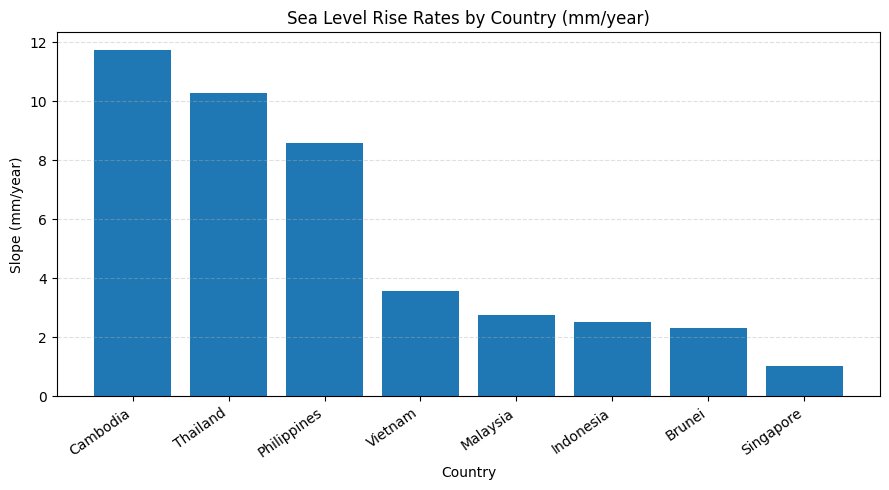

    Country Slope_mm_per_year
   Cambodia             11.74
   Thailand             10.27
Philippines              8.58
    Vietnam              3.56
   Malaysia              2.76
  Indonesia              2.54
     Brunei              2.32
  Singapore              1.04


In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "SLR data.xlsx"     # adjust path if needed
df = pd.read_excel(file_path, sheet_name="Sheet1")

country_map = {
    704: "Vietnam",
    360: "Indonesia",
    608: "Philippines",
    764: "Thailand",
    458: "Malaysia",
    116: "Cambodia",
    104: "Myanmar",
    418: "Laos",
    96:  "Brunei",
    702: "Singapore",}

df["country"] = df["sea country codes"].map(country_map).fillna(df["sea country codes"].astype(str))

slr_grouped = (
    df.groupby(["year", "country"], as_index=False)["sea level mean"]
      .mean()
      .sort_values(["country", "year"]))

# Figure 1: Time series
plt.figure(figsize=(9, 5))
for country in slr_grouped["country"].unique():
    sub = slr_grouped[slr_grouped["country"] == country]
    plt.plot(sub["year"], sub["sea level mean"], marker="o", linewidth=1.6, label=country)

plt.title("Sea Level Trends by Country (SLR Dataset, Sheet1)")
plt.xlabel("Year")
plt.ylabel("Sea Level Mean (dataset units)")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False, ncol=1)
plt.tight_layout()
# plt.savefig("figure_slr_trends.png", dpi=300)
plt.show()

# Figure 2: Slope (mm/year) bar chart

slopes = []
for country in slr_grouped["country"].unique():
    sub = slr_grouped[slr_grouped["country"] == country]
    if len(sub) >= 2:
        slope, intercept = np.polyfit(sub["year"], sub["sea level mean"], 1)
        slopes.append((country, slope))

slopes_df = pd.DataFrame(slopes, columns=["Country", "Slope_mm_per_year"]).sort_values(
    "Slope_mm_per_year", ascending=False)

plt.figure(figsize=(9, 5))
plt.bar(slopes_df["Country"], slopes_df["Slope_mm_per_year"])
plt.title("Sea Level Rise Rates by Country (mm/year)")
plt.xlabel("Country")
plt.ylabel("Slope (mm/year)")
plt.xticks(rotation=35, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
print(slopes_df.to_string(index=False, formatters={"Slope_mm_per_year": "{:.2f}".format}))
